<a href="https://colab.research.google.com/github/ffelicioni/tp_infoviz/blob/main/Mapas_Vast_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - city of Engagement, Ohio USA

## Modulos

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
from shapely import wkt
import seaborn as sns
from pandas.plotting import parallel_coordinates

from scipy.stats import chi2_contingency
from tabulate import tabulate

import json

### Funciones

In [3]:
def tabla_contigencia(df,X,Y): 
  contigency= pd.crosstab(df[X], df[Y])
  print(tabulate(contigency, headers='keys', tablefmt='psql'))
  contigency_pct = pd.crosstab(df[X], df[Y], normalize='all')
  print(tabulate(contigency_pct, headers='keys', tablefmt='psql'))
  c, p, dof, expected = chi2_contingency(contigency)
  print('pvalor',p, 'X-squared', c)
  texto='rechaza hipótesis nula que sostiene independencia entre variables '+X+' y '+Y
  print('SI '+ texto if p <0.1 else 'NO '+texto)

## Datasets

En los dataset que tengo "location" renombro dicha columna como "geometry" y le agrego una columna que se llame "type" con la descripción del tipo de edificio para luego preparar dataset para graficar el mapa. 

In [4]:
path='https://raw.githubusercontent.com/ffelicioni/tp_infoviz/main/data'

In [5]:
participants=pd.read_csv(path+"/Attributes/Participants.csv")
participants

,participantId,householdSize,haveKids,age,educationLevel,interestGroup,joviality
0,0,3,True,36,HighSchoolOrCollege,H,0.001627
1,1,3,True,25,HighSchoolOrCollege,B,0.328087
2,2,3,True,35,HighSchoolOrCollege,A,0.393470
3,3,3,True,21,HighSchoolOrCollege,I,0.138063
4,4,3,True,43,Bachelors,H,0.857397
...,...,...,...,...,...,...,...
1006,1006,1,False,19,HighSchoolOrCollege,J,0.639268
1007,1007,1,False,40,HighSchoolOrCollege,B,0.934348
1008,1008,1,False,23,Graduate,C,0.163721
1009,1009,1,False,39,Low,B,0.828330


In [6]:
schools=pd.read_csv(path+"/Attributes/Schools.csv")
schools.rename(columns={"location": "geometry"},inplace=True)
schools['geometry'] = schools['geometry'].apply(wkt.loads)
schools['type']='school'
schools

,schoolId,monthlyCost,maxEnrollment,geometry,buildingId,type
0,0,12.812445,242,POINT (-376.7505037068263 1607.9843212558562),662,school
1,450,91.143514,418,POINT (-2597.447677094323 3194.1547530883445),943,school
2,900,38.005380,394,POINT (-2539.1584040534744 6556.0323181733565),262,school
3,1350,73.197852,384,POINT (-4701.462928834322 5141.762936081409),123,school


In [7]:
restaurants=pd.read_csv(path+"/Attributes/Restaurants.csv")
restaurants.rename(columns={"location": "geometry"},inplace=True)
restaurants['geometry'] = restaurants['geometry'].apply(wkt.loads)
restaurants['type']='restaurants'
restaurants

,restaurantId,foodCost,maxOccupancy,geometry,buildingId,type
0,445,5.15,71,POINT (631.5130723031391 2001.4772026036535),304,restaurants
1,446,4.17,82,POINT (413.840000705876 1194.128694228948),308,restaurants
2,447,5.87,119,POINT (497.9967937001494 1624.515148185587),58,restaurants
3,448,4.07,98,POINT (698.2411158717262 4392.416668183332),964,restaurants
4,449,5.11,53,POINT (1407.7107695149243 4010.4574815269225),181,restaurants
5,895,4.44,103,POINT (-1623.0740591441258 3872.0300113645017),164,restaurants
6,896,5.86,107,POINT (-2126.1723943111892 4285.182228265561),619,restaurants
7,897,5.76,104,POINT (-1989.63526350385 3368.764837974986),875,restaurants
8,898,4.22,115,POINT (-1771.452216635636 4343.580176583138),917,restaurants
9,899,5.65,85,POINT (-820.9290279479601 4497.243308530136),86,restaurants


In [8]:
pubs=pd.read_csv(path+"/Attributes/Pubs.csv")
pubs.rename(columns={"location": "geometry"},inplace=True)
pubs['geometry'] = pubs['geometry'].apply(wkt.loads)
pubs['type']='pubs'
pubs

,pubId,hourlyCost,maxOccupancy,geometry,buildingId,type
0,442,8.281103,64,POINT (964.4380231713202 3991.603473784208),556,pubs
1,443,6.417435,64,POINT (1809.880173357865 4339.172426035451),29,pubs
2,444,12.581806,84,POINT (770.4279044387976 932.5852003214752),1012,pubs
3,892,11.642905,96,POINT (-1524.9573211662105 3815.271490114369),502,pubs
4,893,14.840473,79,POINT (-1608.766411449925 3886.4924784954583),164,pubs
5,894,12.311210,72,POINT (-1702.5378155541193 3865.477090848479),238,pubs
6,1342,14.140037,77,POINT (-260.45747053139064 5026.150804179361),429,pubs
7,1343,10.524972,67,POINT (-501.42676062779447 3551.572638649489),489,pubs
8,1344,10.415293,60,POINT (-225.9209866450221 3878.053697626113),585,pubs
9,1798,11.545351,64,POINT (-3209.738139187618 6487.657688065099),953,pubs


Entre los buildings hay tres tipos de edificios, commercial, residential y school

In [9]:
buildings=pd.read_csv(path+"/Attributes/Buildings.csv")
buildings.rename(columns={"location": "geometry"},inplace=True)
buildings['geometry'] = buildings['geometry'].apply(wkt.loads)
buildings['type']=buildings['buildingType'].str.lower()
print(buildings.buildingType.unique())

print(buildings.describe())

['Commercial' 'Residental' 'School']
        buildingId  maxOccupancy
count  1042.000000    503.000000
mean    521.500000     15.506958
std     300.943793     37.030291
min       1.000000      1.000000
25%     261.250000      5.000000
50%     521.500000      7.000000
75%     781.750000     12.000000
max    1042.000000    418.000000


In [10]:
apartments=pd.read_csv(path+"/Attributes/Apartments.csv")
apartments.rename(columns={"location": "geometry"},inplace=True)
apartments['geometry'] = apartments['geometry'].apply(wkt.loads)
apartments['type']='apartments'
apartments.describe()

,apartmentId,rentalCost,maxOccupancy,numberOfRooms,buildingId
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,867.355966,814.495168,2.508899,2.487805,543.369150
std,516.527633,278.784568,1.112750,1.108561,305.765594
min,1.000000,348.400000,1.000000,1.000000,2.000000
25%,452.000000,602.340000,2.000000,1.000000,286.000000
50%,903.000000,804.370000,3.000000,3.000000,551.000000
75%,1354.000000,997.940000,3.000000,3.000000,824.000000
max,1733.000000,1601.110000,4.000000,4.000000,1040.000000


In [11]:
employers=pd.read_csv(path+"/Attributes/Employers.csv")
employers.rename(columns={"location": "geometry"},inplace=True)
employers['geometry'] = employers['geometry'].apply(wkt.loads)
employers['type']='employers'
employers.describe()

,employerId,buildingId
count,253.000000,253.000000
mean,1089.059289,517.778656
std,507.094228,303.345131
min,379.000000,3.000000
25%,829.000000,261.000000
50%,1279.000000,486.000000
75%,1734.000000,782.000000
max,1797.000000,1041.000000


In [12]:
jobs=pd.read_csv(path+"/Attributes/Jobs.csv")
jobs.rename(columns={"location": "geometry"},inplace=True)
jobs.describe()

,jobId,employerId,hourlyRate
count,1328.000000,1328.000000,1328.000000
mean,663.500000,1058.746988,19.133254
std,383.504889,506.383844,12.199933
min,0.000000,379.000000,10.000000
25%,331.750000,438.000000,10.028742
50%,663.500000,884.000000,14.743775
75%,995.250000,1337.000000,23.317398
max,1327.000000,1797.000000,100.000000


## Análisis de participantes

In [13]:
participants

,participantId,householdSize,haveKids,age,educationLevel,interestGroup,joviality
0,0,3,True,36,HighSchoolOrCollege,H,0.001627
1,1,3,True,25,HighSchoolOrCollege,B,0.328087
2,2,3,True,35,HighSchoolOrCollege,A,0.393470
3,3,3,True,21,HighSchoolOrCollege,I,0.138063
4,4,3,True,43,Bachelors,H,0.857397
...,...,...,...,...,...,...,...
1006,1006,1,False,19,HighSchoolOrCollege,J,0.639268
1007,1007,1,False,40,HighSchoolOrCollege,B,0.934348
1008,1008,1,False,23,Graduate,C,0.163721
1009,1009,1,False,39,Low,B,0.828330


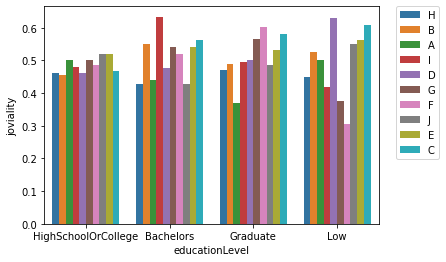

In [14]:
g = sns.barplot(data=participants, x='educationLevel', y='joviality',hue='interestGroup', ci=None)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

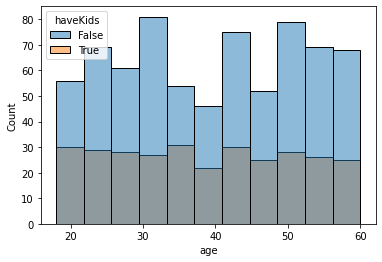

In [15]:
g2=sns.histplot(data=participants, x='age',hue='haveKids')

In [16]:
participants.educationLevel.value_counts()

HighSchoolOrCollege    525
Bachelors              232
Graduate               170
Low                     84
Name: educationLevel, dtype: int64

In [17]:
# escala educativa
scale_mapper = {"Low":1, "HighSchoolOrCollege":2, "Bachelors":3,"Graduate":4}
participants["educationScale"] = participants.educationLevel.replace(scale_mapper)

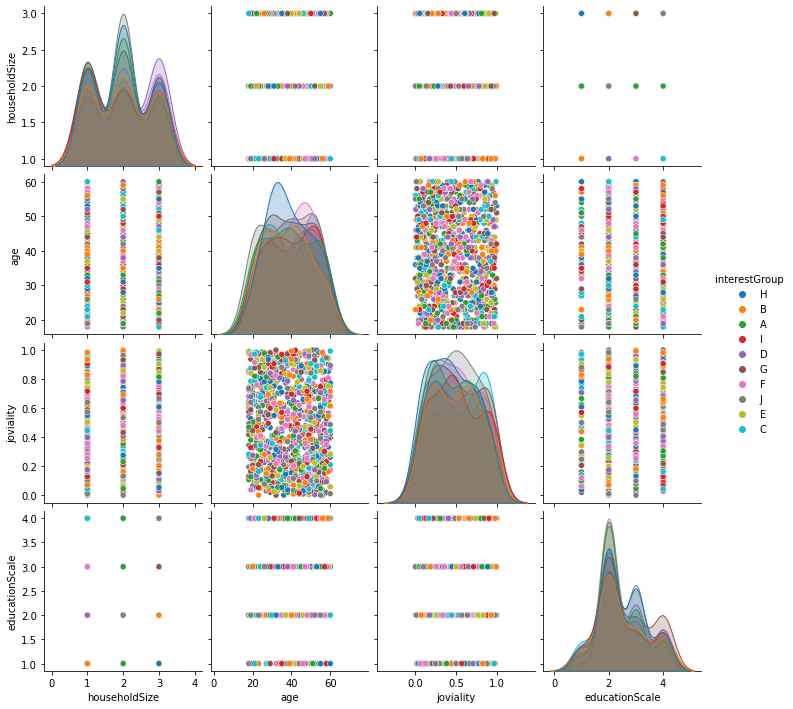

In [18]:
sns.pairplot(participants,vars = ['householdSize', 'age', 'joviality','educationScale'],hue = 'interestGroup')

In [19]:
X='educationLevel'
Y='interestGroup'
tabla_contigencia(participants,X,Y)

+---------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| educationLevel      |   A |   B |   C |   D |   E |   F |   G |   H |   I |   J |
|---------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----|
| Bachelors           |  24 |  19 |  21 |  27 |  12 |  20 |  24 |  34 |  17 |  34 |
| Graduate            |  12 |  17 |  15 |  17 |  18 |  17 |  26 |  16 |  17 |  15 |
| HighSchoolOrCollege |  59 |  45 |  54 |  49 |  47 |  63 |  47 |  51 |  52 |  58 |
| Low                 |   7 |  10 |  12 |   3 |   6 |   6 |  11 |  10 |  10 |   9 |
+---------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+---------------------+------------+-----------+-----------+------------+------------+------------+-----------+-----------+-----------+------------+
| educationLevel      |          A |         B |         C |          D |          E |          F |         G |         H |         I |          J |
|---------------------+-------

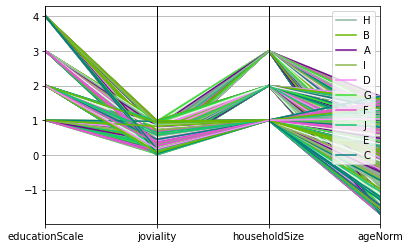

In [20]:
# normalizar edad
participants["ageNorm"] = (participants.age-participants.age.mean())/participants.age.std()

parallel_coordinates(participants,cols=['educationScale', 'joviality','householdSize','ageNorm'], class_column='interestGroup')

In [21]:
df_join=pd.read_csv(path+"/Journals/df_join.csv")
df_join.last_activity[0]

'2023-05-25 00:00:00+00:00'

In [22]:
df_join=df_join[df_join.last_activity>'2022-03-15 00:00:00+00:00']
df_join.columns

Index(['participantId', 'householdSize', 'haveKids', 'age', 'educationLevel',
       'interestGroup', 'joviality', 'educationScale', 'amount_sum',
       'amount_count', 'Wage_sum', 'Wage_count', 'Education_sum',
       'Education_count', 'Food_sum', 'Food_count', 'Food_mean',
       'Recreation_sum', 'Recreation_count', 'Recreation_mean', 'Shelter_sum',
       'Shelter_mean', 'Shelter_count', 'apartmentId', 'rentalCost',
       'loc_apart', 'bd_apart', 'employerId', 'loc_job', 'bd_job',
       'pubs_count', 'resto_count', 'sent_message', 'last_activity'],
      dtype='object')

### Datos para mapa según interest Group

In [23]:
df_join1=df_join[['participantId','interestGroup','loc_apart']]
df_join1.rename(columns={'loc_apart': "geometry",'interestGroup':'type','participantId':'buildingId'},inplace=True)
df_join1['geometry'] = df_join1['geometry'].apply(wkt.loads)
df_join1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,buildingId,type,geometry
0,0,H,POINT (-2721.353174109782 6862.8612194660855)
1,1,B,POINT (-1531.1328847088653 5597.244219744858)
2,2,A,POINT (-1352.9677515710423 2095.779439981468)
3,3,I,POINT (-1550.046162256439 5606.726708601213)
4,4,H,POINT (1488.4782480253098 3490.8932244227935)
...,...,...,...
1006,1006,J,POINT (-4227.336286275546 5302.398116843493)
1007,1007,B,POINT (-3969.0504091036228 6563.13915343977)
1008,1008,C,POINT (-2158.723146778084 2525.141681242502)
1009,1009,B,POINT (-2366.8125352782386 4880.767219945067)


### Datos para mapa de EducationLevel

In [24]:
df_join2=df_join[['participantId','educationLevel','loc_apart']]
df_join2.rename(columns={'loc_apart': "geometry",'educationLevel':'type','participantId':'buildingId'},inplace=True)
df_join2['geometry'] = df_join2['geometry'].apply(wkt.loads)
df_join2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,buildingId,type,geometry
0,0,HighSchoolOrCollege,POINT (-2721.353174109782 6862.8612194660855)
1,1,HighSchoolOrCollege,POINT (-1531.1328847088653 5597.244219744858)
2,2,HighSchoolOrCollege,POINT (-1352.9677515710423 2095.779439981468)
3,3,HighSchoolOrCollege,POINT (-1550.046162256439 5606.726708601213)
4,4,Bachelors,POINT (1488.4782480253098 3490.8932244227935)
...,...,...,...
1006,1006,HighSchoolOrCollege,POINT (-4227.336286275546 5302.398116843493)
1007,1007,HighSchoolOrCollege,POINT (-3969.0504091036228 6563.13915343977)
1008,1008,Graduate,POINT (-2158.723146778084 2525.141681242502)
1009,1009,Low,POINT (-2366.8125352782386 4880.767219945067)


### Datos para mapa según ingresos

{'boxes': [<matplotlib.lines.Line2D at 0x7f17a95d9950>],
 'caps': [<matplotlib.lines.Line2D at 0x7f17a95dc950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f17a95e3990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f17a95e3450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f17a95d9e90>,
  <matplotlib.lines.Line2D at 0x7f17a95dc410>]}

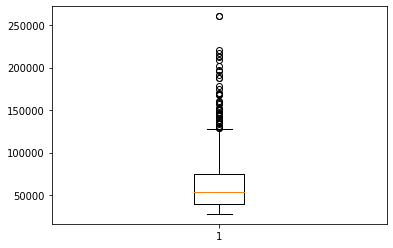

In [25]:
plt.boxplot(df_join.Wage_sum)

In [26]:
print(df_join.Wage_sum.quantile([0.25, 0.5, 0.75]))
levels=df_join.Wage_sum.quantile([0.25, 0.5, 0.75])
levels

0.25    38976.426459
0.50    53735.457849
0.75    74759.734267
Name: Wage_sum, dtype: float64


0.25    38976.426459
0.50    53735.457849
0.75    74759.734267
Name: Wage_sum, dtype: float64

In [27]:
df_join['Wage_level'] = pd.cut(df_join['Wage_sum'], [0, levels.values[0],levels.values[1], levels.values[2],1000000], labels=['Nivel1', 'Nivel2', 'Nivel3','Nivel4'])
df_join.Wage_level.value_counts()

Nivel1    220
Nivel2    220
Nivel3    220
Nivel4    220
Name: Wage_level, dtype: int64

In [28]:
df_join3=df_join[['participantId','Wage_level','loc_apart']].copy()
df_join3.rename(columns={'loc_apart': "geometry",'Wage_level':'type','participantId':'buildingId'},inplace=True)
df_join3['geometry'] = df_join3['geometry'].apply(wkt.loads)
df_join3

,buildingId,type,geometry
0,0,Nivel4,POINT (-2721.353174109782 6862.8612194660855)
1,1,Nivel4,POINT (-1531.1328847088653 5597.244219744858)
2,2,Nivel4,POINT (-1352.9677515710423 2095.779439981468)
3,3,Nivel4,POINT (-1550.046162256439 5606.726708601213)
4,4,Nivel4,POINT (1488.4782480253098 3490.8932244227935)
...,...,...,...
1006,1006,Nivel1,POINT (-4227.336286275546 5302.398116843493)
1007,1007,Nivel1,POINT (-3969.0504091036228 6563.13915343977)
1008,1008,Nivel3,POINT (-2158.723146778084 2525.141681242502)
1009,1009,Nivel1,POINT (-2366.8125352782386 4880.767219945067)


## Según comunidades

In [29]:
df_comunidades=pd.read_csv(path+"/Journals/comunidades_com.csv")
df_join4=pd.merge(df_comunidades[['participantId','grupo']],df_join,on='participantId',how='left')
df_join4.grupo=df_join4.grupo.map(str)

df_join4.rename(columns={'loc_apart': "geometry",'grupo':'type','participantId':'buildingId'},inplace=True)
df_join4['geometry'] = df_join4['geometry'].apply(wkt.loads)
df_join4

,buildingId,type,householdSize,haveKids,age,educationLevel,interestGroup,joviality,educationScale,amount_sum,...,geometry,bd_apart,employerId,loc_job,bd_job,pubs_count,resto_count,sent_message,last_activity,Wage_level
0,0,3,3,1,36,HighSchoolOrCollege,H,0.001627,2,116677.828628,...,POINT (-2721.353174109782 6862.8612194660855),810.0,424,POINT (39.59877121487088 1259.7742218297456),936.0,380.0,473,987.0,2023-05-25 00:00:00+00:00,Nivel4
1,316,3,3,1,34,HighSchoolOrCollege,H,0.175386,2,40495.528425,...,POINT (-1803.506193612398 5850.647195738124),841.0,1280,POINT (-501.42676062779447 3608.0722709059037),489.0,376.0,458,4490.0,2023-05-25 00:00:00+00:00,Nivel3
2,367,3,2,0,29,HighSchoolOrCollege,B,0.136645,2,36819.394207,...,POINT (-3323.451449057451 7432.927615583311),818.0,1337,POINT (-2488.0018597976323 5885.7340875007185),269.0,464.0,421,3845.0,2023-05-25 00:00:00+00:00,Nivel3
3,410,3,2,0,42,HighSchoolOrCollege,B,0.175733,2,34394.889709,...,POINT (-4540.795251794218 6999.394029243442),316.0,1328,POINT (-3044.6480084760724 5950.665941497604),434.0,433.0,467,4748.0,2023-05-25 00:00:00+00:00,Nivel3
4,608,3,2,0,24,HighSchoolOrCollege,B,0.358497,2,11158.226193,...,POINT (-2610.5184815063512 6618.97054327486),436.0,1305,POINT (-416.1482587338951 5854.826833733975),64.0,524.0,262,7775.0,2023-05-25 00:00:00+00:00,Nivel1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,927,7,1,0,58,Bachelors,D,0.093250,3,50010.781466,...,POINT (-365.06501570348155 3616.510098967291),449.0,878,POINT (-1104.6810874856722 4468.581510395101),205.0,2.0,456,1408.0,2023-05-25 00:00:00+00:00,Nivel3
876,930,7,1,0,41,HighSchoolOrCollege,F,0.203003,2,26018.840461,...,POINT (-365.06501570348155 3616.510098967291),449.0,434,POINT (800.6342599068146 4103.165163999878),150.0,10.0,296,1439.0,2023-05-25 00:00:00+00:00,Nivel1
877,946,3,1,0,60,HighSchoolOrCollege,J,0.010975,2,21985.125982,...,POINT (-3286.069076202844 6620.496821973378),815.0,857,POINT (-1096.0839701505342 4912.223245927846),190.0,1.0,123,451.0,2023-05-25 00:00:00+00:00,Nivel1
878,965,5,1,0,29,HighSchoolOrCollege,E,0.258534,2,25729.878889,...,POINT (-418.9564517321169 1758.1706991335109),955.0,849,POINT (-2231.66793504236 2598.728790351024),426.0,3.0,454,1353.0,2023-05-25 00:00:00+00:00,Nivel1


In [30]:
comunidades_apart=df_join4[['buildingId','geometry','type','educationScale','interestGroup']].copy()
comunidades_apart.rename(columns={'buildingId': "participantId",'type':'group'},inplace=True)

In [46]:
df_join5=pd.merge(df_comunidades[['participantId','grupo']],df_join,on='participantId',how='left')
df_join5.grupo=df_join5.grupo.map(str)

df_join5.rename(columns={'loc_job': "geometry",'grupo':'group'},inplace=True)
df_join5['geometry'] = df_join5['geometry'].apply(wkt.loads)
df_join5

,participantId,group,householdSize,haveKids,age,educationLevel,interestGroup,joviality,educationScale,amount_sum,...,loc_apart,bd_apart,employerId,geometry,bd_job,pubs_count,resto_count,sent_message,last_activity,Wage_level
0,0,3,3,1,36,HighSchoolOrCollege,H,0.001627,2,116677.828628,...,POINT (-2721.353174109782 6862.8612194660855),810.0,424,POINT (39.59877121487088 1259.7742218297456),936.0,380.0,473,987.0,2023-05-25 00:00:00+00:00,Nivel4
1,316,3,3,1,34,HighSchoolOrCollege,H,0.175386,2,40495.528425,...,POINT (-1803.506193612398 5850.647195738124),841.0,1280,POINT (-501.42676062779447 3608.0722709059037),489.0,376.0,458,4490.0,2023-05-25 00:00:00+00:00,Nivel3
2,367,3,2,0,29,HighSchoolOrCollege,B,0.136645,2,36819.394207,...,POINT (-3323.451449057451 7432.927615583311),818.0,1337,POINT (-2488.0018597976323 5885.7340875007185),269.0,464.0,421,3845.0,2023-05-25 00:00:00+00:00,Nivel3
3,410,3,2,0,42,HighSchoolOrCollege,B,0.175733,2,34394.889709,...,POINT (-4540.795251794218 6999.394029243442),316.0,1328,POINT (-3044.6480084760724 5950.665941497604),434.0,433.0,467,4748.0,2023-05-25 00:00:00+00:00,Nivel3
4,608,3,2,0,24,HighSchoolOrCollege,B,0.358497,2,11158.226193,...,POINT (-2610.5184815063512 6618.97054327486),436.0,1305,POINT (-416.1482587338951 5854.826833733975),64.0,524.0,262,7775.0,2023-05-25 00:00:00+00:00,Nivel1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,927,7,1,0,58,Bachelors,D,0.093250,3,50010.781466,...,POINT (-365.06501570348155 3616.510098967291),449.0,878,POINT (-1104.6810874856722 4468.581510395101),205.0,2.0,456,1408.0,2023-05-25 00:00:00+00:00,Nivel3
876,930,7,1,0,41,HighSchoolOrCollege,F,0.203003,2,26018.840461,...,POINT (-365.06501570348155 3616.510098967291),449.0,434,POINT (800.6342599068146 4103.165163999878),150.0,10.0,296,1439.0,2023-05-25 00:00:00+00:00,Nivel1
877,946,3,1,0,60,HighSchoolOrCollege,J,0.010975,2,21985.125982,...,POINT (-3286.069076202844 6620.496821973378),815.0,857,POINT (-1096.0839701505342 4912.223245927846),190.0,1.0,123,451.0,2023-05-25 00:00:00+00:00,Nivel1
878,965,5,1,0,29,HighSchoolOrCollege,E,0.258534,2,25729.878889,...,POINT (-418.9564517321169 1758.1706991335109),955.0,849,POINT (-2231.66793504236 2598.728790351024),426.0,3.0,454,1353.0,2023-05-25 00:00:00+00:00,Nivel1


## Genero mapa

Concateno las columnas de geometria, buildingID y type. Escuelas, restaurants y pubs tienen geometría "POINT" mientras que los buildings tiene "POLYGON"

In [31]:
#solo concateno escuelas, restaurantes, pubs, buildings
df=pd.concat([schools[['geometry','buildingId','type']]
              ,restaurants[['geometry','buildingId','type']]
              ,pubs[['geometry','buildingId','type']]
              ,buildings[['geometry','buildingId','type']]
              ,employers[['geometry','buildingId','type']]
              ,df_join1[['geometry','buildingId','type']]
              ,df_join2[['geometry','buildingId','type']]
              ,df_join3[['geometry','buildingId','type']]
              ,df_join4[['geometry','buildingId','type']]
             ])
df

,geometry,buildingId,type
0,POINT (-376.7505037068263 1607.9843212558562),662,school
1,POINT (-2597.447677094323 3194.1547530883445),943,school
2,POINT (-2539.1584040534744 6556.0323181733565),262,school
3,POINT (-4701.462928834322 5141.762936081409),123,school
0,POINT (631.5130723031391 2001.4772026036535),304,restaurants
...,...,...,...
875,POINT (-365.06501570348155 3616.510098967291),927,7
876,POINT (-365.06501570348155 3616.510098967291),930,7
877,POINT (-3286.069076202844 6620.496821973378),946,3
878,POINT (-418.9564517321169 1758.1706991335109),965,5


In [32]:
crs={'init':'epsg:3395'}
#Ohio UTC -4
geo_df=gpd.GeoDataFrame(df,crs=crs)
#geo_df.to_crs('EPSG:3395')

geo_df

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geometry,buildingId,type
0,POINT (-376.751 1607.984),662,school
1,POINT (-2597.448 3194.155),943,school
2,POINT (-2539.158 6556.032),262,school
3,POINT (-4701.463 5141.763),123,school
0,POINT (631.513 2001.477),304,restaurants
...,...,...,...
875,POINT (-365.065 3616.510),927,7
876,POINT (-365.065 3616.510),930,7
877,POINT (-3286.069 6620.497),946,3
878,POINT (-418.956 1758.171),965,5


### Mapa según interestGroup

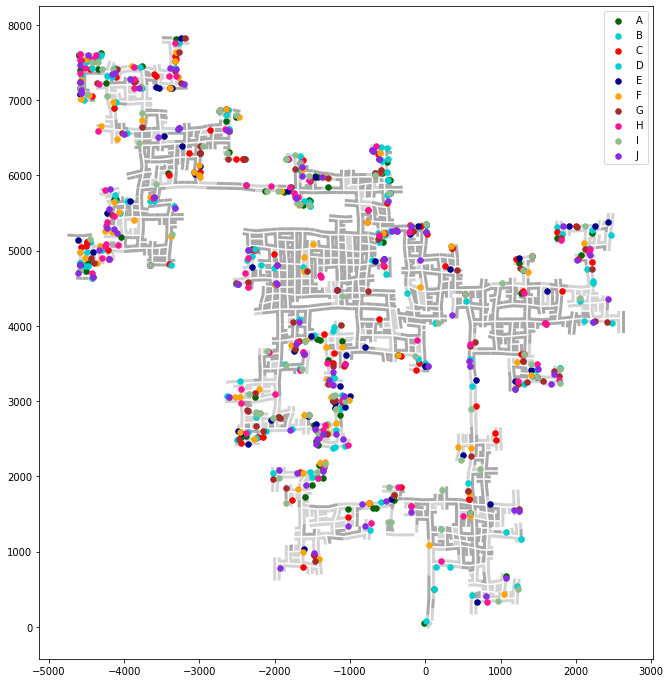

In [33]:
world = gpd.read_file(gpd.geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='white', figsize=(12, 12))
#cities.plot(ax=ax, marker='o', color='blue', markersize=5);
geo_df[geo_df['type']=='residental'].plot(ax=ax, markersize=5,color='lightgray',label="residental")
geo_df[geo_df['type']=='commercial'].plot(ax=ax, markersize=5,color='darkgray',label="commercial")
#geo_df[geo_df['type']=='employers'].plot(ax=ax, markersize=30,color='darkturquoise',marker="o",label="employers")
#geo_df[geo_df['type']=='pubs'].plot(ax=ax, markersize=30,color='darkblue',marker="o",label="pubs")
#geo_df[geo_df['type']=='restaurants'].plot(ax=ax, markersize=30,color='red',marker="o",label="restaurants")
#geo_df[geo_df['type']=='school'].plot(ax=ax, markersize=30,color='darkgreen',marker="o",label="schools")
geo_df[geo_df['type']=='A'].plot(ax=ax, markersize=30,color='darkgreen',marker="o",label="A")
geo_df[geo_df['type']=='B'].plot(ax=ax, markersize=30,color='darkturquoise',marker="o",label="B")
geo_df[geo_df['type']=='C'].plot(ax=ax, markersize=30,color='red',marker="o",label="C")
geo_df[geo_df['type']=='D'].plot(ax=ax, markersize=30,color='darkturquoise',marker="o",label="D")
geo_df[geo_df['type']=='E'].plot(ax=ax, markersize=30,color='darkblue',marker="o",label="E")
geo_df[geo_df['type']=='F'].plot(ax=ax, markersize=30,color='orange',marker="o",label="F")
geo_df[geo_df['type']=='G'].plot(ax=ax, markersize=30,color='brown',marker="o",label="G")
geo_df[geo_df['type']=='H'].plot(ax=ax, markersize=30,color='deeppink',marker="o",label="H")
geo_df[geo_df['type']=='I'].plot(ax=ax, markersize=30,color='darkseagreen',marker="o",label="I")
geo_df[geo_df['type']=='J'].plot(ax=ax, markersize=30,color='blueviolet',marker="o",label="J")

ax.legend(prop={'size':10})

plt.show()

* gris claro, residenciales
* gris medio, comerciales

### Mapa según Education Level

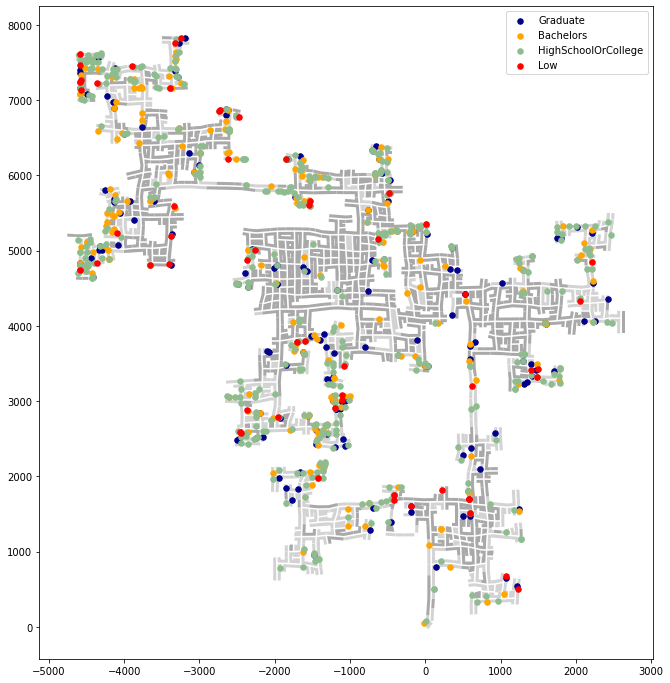

In [34]:
world = gpd.read_file(gpd.geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='white', figsize=(12, 12))
#cities.plot(ax=ax, marker='o', color='blue', markersize=5);
geo_df[geo_df['type']=='residental'].plot(ax=ax, markersize=5,color='lightgray',label="residental")
geo_df[geo_df['type']=='commercial'].plot(ax=ax, markersize=5,color='darkgray',label="commercial")
#geo_df[geo_df['type']=='employers'].plot(ax=ax, markersize=30,color='darkturquoise',marker="o",label="employers")
#geo_df[geo_df['type']=='pubs'].plot(ax=ax, markersize=30,color='darkblue',marker="o",label="pubs")
#geo_df[geo_df['type']=='restaurants'].plot(ax=ax, markersize=30,color='red',marker="o",label="restaurants")
#geo_df[geo_df['type']=='school'].plot(ax=ax, markersize=30,color='darkgreen',marker="o",label="schools")
geo_df[geo_df['type']=='Graduate'].plot(ax=ax, markersize=30,color='darkblue',marker="o",label="Graduate")
geo_df[geo_df['type']=='Bachelors'].plot(ax=ax, markersize=30,color='orange',marker="o",label="Bachelors")
geo_df[geo_df['type']=='HighSchoolOrCollege'].plot(ax=ax, markersize=30,color='darkseagreen',marker="o",label="HighSchoolOrCollege")
geo_df[geo_df['type']=='Low'].plot(ax=ax, markersize=30,color='red',marker="o",label="Low")
ax.legend(prop={'size':10})

plt.show()

### Mapa según nivel de ingresos Wage_level

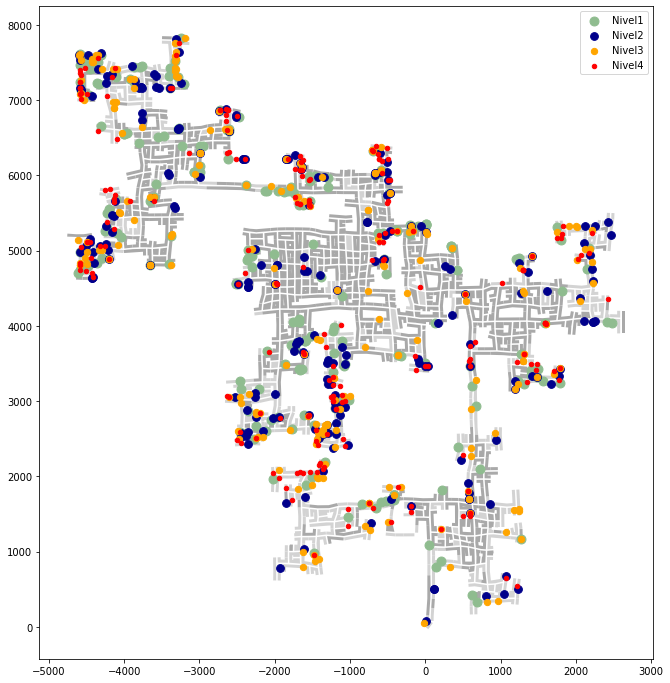

In [35]:
world = gpd.read_file(gpd.geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='white', figsize=(12, 12))
#cities.plot(ax=ax, marker='o', color='blue', markersize=5);
geo_df[geo_df['type']=='residental'].plot(ax=ax, markersize=5,color='lightgray',label="residental")
geo_df[geo_df['type']=='commercial'].plot(ax=ax, markersize=5,color='darkgray',label="commercial")
geo_df[geo_df['type']=='Nivel1'].plot(ax=ax, markersize=80,color='darkseagreen',marker="o",label="Nivel1")
geo_df[geo_df['type']=='Nivel2'].plot(ax=ax, markersize=60,color='darkblue',marker="o",label="Nivel2")
geo_df[geo_df['type']=='Nivel3'].plot(ax=ax, markersize=40,color='orange',marker="o",label="Nivel3")
geo_df[geo_df['type']=='Nivel4'].plot(ax=ax, markersize=20,color='red',marker="o",label="Nivel4")
ax.legend(prop={'size':10})

plt.show()

scatterplot

In [36]:
#df_join.columns
#df_join.set_index('participantId',inplace=True)

In [37]:
#df_join[['age','joviality','Wage_sum','educationScale','pubs_count']]

In [38]:
#df_join.columns

In [39]:
#sns.pairplot(df_join[['age','joviality','Wage_sum','educationScale','pubs_count','interestGroup','sent_message']],hue='interestGroup')

## Mapa según comunidades de red social

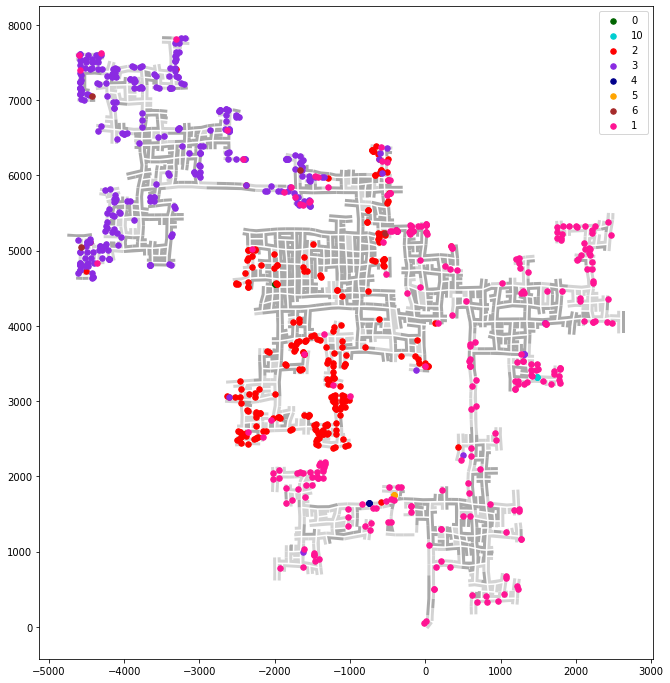

In [40]:
world = gpd.read_file(gpd.geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='white', figsize=(12, 12))
#cities.plot(ax=ax, marker='o', color='blue', markersize=5);
geo_df[geo_df['type']=='residental'].plot(ax=ax, markersize=5,color='lightgray',label="residental")
geo_df[geo_df['type']=='commercial'].plot(ax=ax, markersize=5,color='darkgray',label="commercial")
#geo_df[geo_df['type']=='employers'].plot(ax=ax, markersize=30,color='darkturquoise',marker="o",label="employers")
#geo_df[geo_df['type']=='pubs'].plot(ax=ax, markersize=30,color='darkblue',marker="o",label="pubs")
#geo_df[geo_df['type']=='restaurants'].plot(ax=ax, markersize=30,color='red',marker="o",label="restaurants")
#geo_df[geo_df['type']=='school'].plot(ax=ax, markersize=30,color='darkgreen',marker="o",label="schools")
geo_df[geo_df['type']=='0'].plot(ax=ax, markersize=30,color='darkgreen',marker="o",label="0")
geo_df[geo_df['type']=='10'].plot(ax=ax, markersize=30,color='darkturquoise',marker="o",label="10")
geo_df[geo_df['type']=='2'].plot(ax=ax, markersize=30,color='red',marker="o",label="2")
geo_df[geo_df['type']=='3'].plot(ax=ax, markersize=30,color='blueviolet',marker="o",label="3")
geo_df[geo_df['type']=='4'].plot(ax=ax, markersize=30,color='darkblue',marker="o",label="4")
geo_df[geo_df['type']=='5'].plot(ax=ax, markersize=30,color='orange',marker="o",label="5")
geo_df[geo_df['type']=='6'].plot(ax=ax, markersize=30,color='brown',marker="o",label="6")
geo_df[geo_df['type']=='1'].plot(ax=ax, markersize=30,color='deeppink',marker="o",label="1")
#geo_df[geo_df['type']=='I'].plot(ax=ax, markersize=30,color='darkseagreen',marker="o",label="I")
#geo_df[geo_df['type']=='J'].plot(ax=ax, markersize=30,color='blueviolet',marker="o",label="J")

ax.legend(prop={'size':10})

plt.show()

In [41]:
df_comunidades.grupo.value_counts()

3     319
1     258
2     252
15      5
13      4
12      4
7       4
8       4
6       4
5       4
4       4
10      3
14      3
16      3
0       3
9       3
11      3
Name: grupo, dtype: int64

In [42]:
crs={'init':'epsg:3395'}
#Ohio UTC -4
geo_bd=gpd.GeoDataFrame(buildings,crs=crs)
#geo_df.to_crs('EPSG:3395')

geo_bd

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,buildingId,geometry,buildingType,maxOccupancy,units,type
0,1,"POLYGON ((350.064 4595.666, 390.063 4595.892, ...",Commercial,NaN,NaN,commercial
1,2,"POLYGON ((-1926.973 2725.611, -1948.191 2730.2...",Residental,12.0,"[481,498,534,652,818]",residental
2,3,"POLYGON ((685.685 1552.131, 645.998 1547.130, ...",Commercial,NaN,[382],commercial
3,4,"POLYGON ((-976.785 4542.382, -1053.288 4531.35...",Commercial,NaN,NaN,commercial
4,5,"POLYGON ((1259.306 3572.727, 1299.255 3574.747...",Residental,2.0,[231],residental
...,...,...,...,...,...,...
1037,1038,"POLYGON ((361.233 4376.884, 390.521 4376.722, ...",Residental,8.0,"[118,287]",residental
1038,1039,"POLYGON ((1011.546 362.970, 1011.169 322.972, ...",Residental,2.0,[365],residental
1039,1040,"POLYGON ((-3562.807 7362.923, -3557.337 7294.1...",Residental,5.0,"[1406,1564,1569]",residental
1040,1041,"POLYGON ((-4151.700 5418.613, -4116.226 5419.1...",Commercial,NaN,[1737],commercial


In [43]:
bd_json=geo_bd.to_json()
with open('buildings.json', 'w') as outfile1:
    outfile1.write(json.dumps(bd_json))

In [44]:
geo_apart=gpd.GeoDataFrame(comunidades_apart,crs=crs)
#geo_df.to_crs('EPSG:3395')

geo_apart

apart_json=geo_apart.to_json()
with open('apartments.json', 'w') as outfile1:
    outfile1.write(json.dumps(apart_json))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [50]:
comunidades_job=df_join5[['participantId','geometry','group','educationScale','interestGroup']].copy()

geo_job=gpd.GeoDataFrame(comunidades_job,crs=crs)
#geo_df.to_crs('EPSG:3395')

geo_job

apart_job=geo_job.to_json()


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
